In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('quora_dataset.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404010,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404011,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404012,404348,789796,789797,What is one coin?,What's this coin?,0
404013,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
new_df= df.sample(30000, random_state=2)

In [4]:
new_df.shape

(30000, 6)

In [5]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

0    18880
1    11120
Name: is_duplicate, dtype: int64
0    62.933333
1    37.066667
Name: is_duplicate, dtype: float64


<AxesSubplot:>

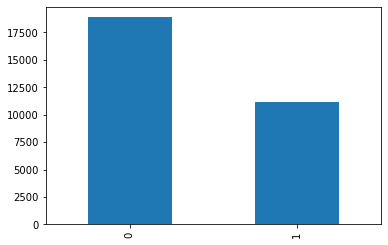

In [6]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [7]:
qid = pd.Series(new_df['question1'].tolist() + new_df['question2'].tolist())
print('Number of unique questions: ',np.unique(qid).shape[0])
x = qid.value_counts() >1
print('Number of questions getting repeated: ',x[x].shape[0])

Number of unique questions:  55474
Number of questions getting repeated:  3439


In [8]:
type(qid)

pandas.core.series.Series

In [9]:
type(np.unique(qid))

numpy.ndarray

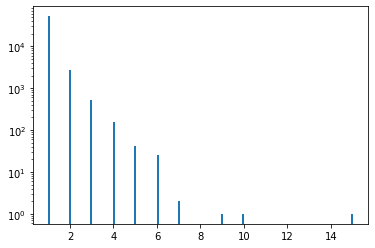

In [10]:
plt.hist(qid.value_counts().values ,bins=160)
plt.yscale('log')
plt.show()

In [11]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [12]:
type(new_df['question1'])

pandas.core.series.Series

In [13]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
95166,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54
185366,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49
178034,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57
366635,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62
215719,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50
...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,What's the best place to visit for summer?,What is the best place to visit in summer?,1,42,42
277646,277866,546311,546312,How can I get over this girl?,How do I get over a girl I cannot be with?,1,29,42
387331,387648,757859,757860,How do I become a graphics designer?,Should I become a graphic designer?,0,36,35
279974,280197,550837,550838,How do I bake a cake in a microwave oven?,How do you bake cakes in a convection oven?,0,41,43


In [14]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda x : len(x.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda x : len(x.split(" ")))
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
95166,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9
185366,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10
178034,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9
366635,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10
215719,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10
...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,What's the best place to visit for summer?,What is the best place to visit in summer?,1,42,42,8,9
277646,277866,546311,546312,How can I get over this girl?,How do I get over a girl I cannot be with?,1,29,42,7,11
387331,387648,757859,757860,How do I become a graphics designer?,Should I become a graphic designer?,0,36,35,7,6
279974,280197,550837,550838,How do I bake a cake in a microwave oven?,How do you bake cakes in a convection oven?,0,41,43,10,9


In [15]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [16]:
new_df['word_common'] = new_df.apply(common_words ,axis=1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
95166,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9,1
185366,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10,5
178034,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9,4
366635,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10,2
215719,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10,4
...,...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,What's the best place to visit for summer?,What is the best place to visit in summer?,1,42,42,8,9,6
277646,277866,546311,546312,How can I get over this girl?,How do I get over a girl I cannot be with?,1,29,42,7,11,4
387331,387648,757859,757860,How do I become a graphics designer?,Should I become a graphic designer?,0,36,35,7,6,4
279974,280197,550837,550838,How do I bake a cake in a microwave oven?,How do you bake cakes in a convection oven?,0,41,43,10,9,6


In [17]:
def total_words(row):
    w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return (len(w1.union(w2)))

In [18]:
new_df['total_words'] = new_df.apply(total_words, axis=1)

In [19]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
95166,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9,1,14
185366,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10,5,27
178034,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9,4,15
366635,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10,2,28
215719,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,What's the best place to visit for summer?,What is the best place to visit in summer?,1,42,42,8,9,6,11
277646,277866,546311,546312,How can I get over this girl?,How do I get over a girl I cannot be with?,1,29,42,7,11,4,13
387331,387648,757859,757860,How do I become a graphics designer?,Should I become a graphic designer?,0,36,35,7,6,4,9
279974,280197,550837,550838,How do I bake a cake in a microwave oven?,How do you bake cakes in a convection oven?,0,41,43,10,9,6,12


In [20]:
new_df['word_share'] = round(new_df['word_common']/new_df['total_words'],2)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
95166,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9,1,14,0.07
185366,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10,5,27,0.19
178034,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9,4,15,0.27
366635,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10,2,28,0.07
215719,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10,4,21,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,What's the best place to visit for summer?,What is the best place to visit in summer?,1,42,42,8,9,6,11,0.55
277646,277866,546311,546312,How can I get over this girl?,How do I get over a girl I cannot be with?,1,29,42,7,11,4,13,0.31
387331,387648,757859,757860,How do I become a graphics designer?,Should I become a graphic designer?,0,36,35,7,6,4,9,0.44
279974,280197,550837,550838,How do I bake a cake in a microwave oven?,How do you bake cakes in a convection oven?,0,41,43,10,9,6,12,0.50


In [21]:
new_df['question1'][185366]

"What's the main reason behind 500 & 1000 rs notes getting discontinued in India? With new chances in currency, how will it help India?"

In [22]:
new_df['question2'][185366]

'Why are 500 and 1000 notes being banned in India?'

In [23]:
w1 = set(map(lambda word: word.lower().strip(), "Why I choose USA over India?".split(" ")))
w2 = set(map(lambda word: word.lower().strip(), "Why students choose USA over India?".split(" ")))
print(len(w1 & w2))

5


In [24]:
w1

{'choose', 'i', 'india?', 'over', 'usa', 'why'}

In [25]:
w2

{'choose', 'india?', 'over', 'students', 'usa', 'why'}

In [26]:
len(w1) + len(w2)

12

In [27]:
len(w1.union(w2))

7

In [28]:
w1.union(w2) == w1 & w2

False

In [29]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
95166,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9,1,14,0.07
185366,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10,5,27,0.19
178034,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9,4,15,0.27
366635,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10,2,28,0.07
215719,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10,4,21,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,What's the best place to visit for summer?,What is the best place to visit in summer?,1,42,42,8,9,6,11,0.55
277646,277866,546311,546312,How can I get over this girl?,How do I get over a girl I cannot be with?,1,29,42,7,11,4,13,0.31
387331,387648,757859,757860,How do I become a graphics designer?,Should I become a graphic designer?,0,36,35,7,6,4,9,0.44
279974,280197,550837,550838,How do I bake a cake in a microwave oven?,How do you bake cakes in a convection oven?,0,41,43,10,9,6,12,0.50


count    30000.000000
mean        59.273700
std         29.760077
min          3.000000
25%         39.000000
50%         52.000000
75%         71.000000
max        314.000000
Name: q1_len, dtype: float64

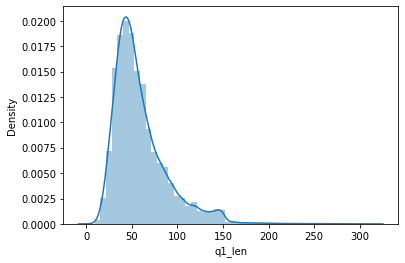

In [30]:
sns.distplot(new_df['q1_len'])
new_df['q1_len'].describe()

count    30000.000000
mean        59.976733
std         33.991062
min          5.000000
25%         39.000000
50%         51.000000
75%         72.000000
max       1151.000000
Name: q2_len, dtype: float64

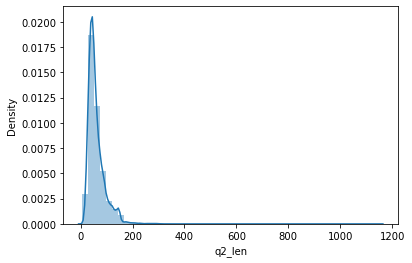

In [31]:
sns.distplot(new_df['q2_len'])
new_df['q2_len'].describe()

In [32]:
new_df[new_df['q2_len']==1151]

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
118508,118598,235058,235059,Am I going to be forever alone? I meant I have...,Heartbreak? Heartbreak? She's my girlfriend fo...,0,114,1151,24,237,11,136,0.08
75680,75742,150503,150504,I'm in 12 steps program. Been sober for 4 year...,Heartbreak? Heartbreak? She's my girlfriend fo...,0,144,1151,30,237,13,142,0.09


In [33]:
new_df[new_df['q2_len']==5]

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
46566,46604,92792,92793,How To Edit DNA?,What?,0,16,5,4,1,0,5,0.0
130558,130655,258788,258789,Does the Quran surah 23: 5-6 prove that Allah ...,Does?,0,85,5,16,1,0,16,0.0


count    30000.000000
mean        10.914033
std          5.424263
min          1.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         62.000000
Name: q1_num_words, dtype: float64

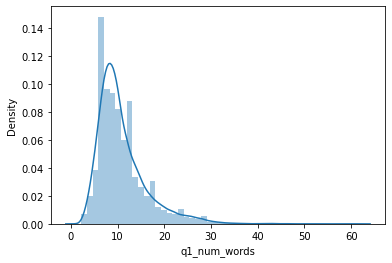

In [34]:
sns.distplot(new_df['q1_num_words'])
new_df['q1_num_words'].describe()

In [35]:
new_df[new_df['q1_num_words']==1]

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
169175,169314,334594,334595,111,I'm looking for the book Intelligent Investor ...,0,3,115,1,23,0,23,0.0
326991,327256,641841,641842,Life:,What is life of life?,0,5,21,1,5,0,6,0.0
297256,297504,584356,584357,civil,What is best DSLR? Canon or Nikon?,0,5,34,1,7,0,8,0.0


In [36]:
new_df[new_df['q1_num_words']==62]

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
62166,62212,123724,123725,I'm a B.E. in electrical & electronics working...,I am software engineer working in e-learning d...,0,298,116,62,22,9,54,0.17


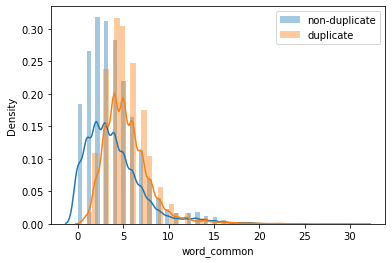

In [37]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'], label='non-duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'], label='duplicate')
plt.legend()
plt.show()

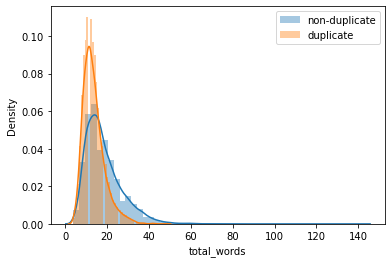

In [38]:
sns.distplot(new_df[new_df['is_duplicate']==0]['total_words'], label='non-duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['total_words'], label='duplicate')
plt.legend()
plt.show()

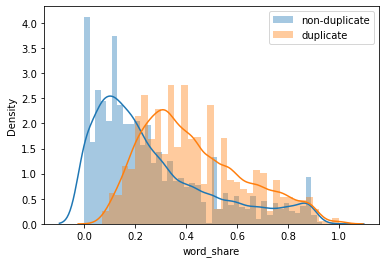

In [39]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'], label='non-duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'], label='duplicate')
plt.legend()
plt.show()

In [40]:
ques_df = new_df[['question1','question2']]
ques_df

,question1,question2
95166,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...
185366,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?
178034,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...
366635,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...
215719,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...
...,...,...
185012,What's the best place to visit for summer?,What is the best place to visit in summer?
277646,How can I get over this girl?,How do I get over a girl I cannot be with?
387331,How do I become a graphics designer?,Should I become a graphic designer?
279974,How do I bake a cake in a microwave oven?,How do you bake cakes in a convection oven?


In [41]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
95166,0,39,54,6,9,1,14,0.07
185366,1,134,49,24,10,5,27,0.19
178034,1,60,57,10,9,4,15,0.27
366635,0,121,62,23,10,2,28,0.07
215719,0,68,50,15,10,4,21,0.19
...,...,...,...,...,...,...,...,...
185012,1,42,42,8,9,6,11,0.55
277646,1,29,42,7,11,4,13,0.31
387331,0,36,35,7,6,4,9,0.44
279974,0,41,43,10,9,6,12,0.50


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [56]:
type(questions)

list

In [44]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
95166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185366,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
387331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279974,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
final_df = pd.concat([final_df ,temp_df],axis=1)
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
95166,0,39,54,6,9,1,14,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
185366,1,134,49,24,10,5,27,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
178034,1,60,57,10,9,4,15,0.27,0,0,...,0,0,0,0,0,0,0,0,0,0
366635,0,121,62,23,10,2,28,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
215719,0,68,50,15,10,4,21,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,1,42,42,8,9,6,11,0.55,0,0,...,0,0,0,0,0,0,0,0,0,0
277646,1,29,42,7,11,4,13,0.31,0,0,...,0,0,0,0,0,0,0,0,0,0
387331,0,36,35,7,6,4,9,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
279974,0,41,43,10,9,6,12,0.50,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
X = final_df.iloc[:,1:]
y= final_df.iloc[:,0]

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values ,final_df.iloc[:,0].values, test_size=0.2, random_state=2)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.78

In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7726666666666666